# Análisis Discriminante Lineal (LDA)

**Autor:** Cristian Daniel Ccopa Acero

**Curso:** Aprendizaje Supervisado

In [1]:
import pandas as pd

file_path = 'buenosclientes.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

df.head()


,codigo oficina,codigo cliente,segmento cash,monto aprobado de cash,codigo analista,ultima garantia,ultima evaluzacion economica,mora promedio del cliente (dias),atraso maximo del cliente (dias),atraso maximo del cliente ultimos 3 meses (dias),...,numero de empresas en la SBS,deuda directa en la SBS,numero de empresas en la SBS del conyugue,deuda directa en la SBS del conyugue,actividad,Ingresos,egresos,resultado neto,categoria analista,sugerido
0,34,340154400,A,1500,9163,...,2017-10-06,0.44,4,0,...,1.0,344.94,NaN,NaN,Otras actividades,2160,1098,1062,SENIOR,1500.0
1,34,340181221,A,1500,9163,GARANTIA PERSONAL ...,2017-04-06,0.00,0,0,...,1.0,3892.17,NaN,NaN,Comercio x Mayor,4890,3437,1453,SENIOR,1500.0
2,34,340008374,A+,12000,9163,...,2017-07-04,1.35,8,5,...,1.0,904.15,NaN,NaN,Otras actividades,22600,19190,3410,SENIOR,12000.0
3,34,340088509,A,1000,9163,...,2017-02-14,0.67,7,7,...,2.0,21802.17,NaN,NaN,Otras actividades,14040,10528,3512,SENIOR,1000.0
4,34,340085851,A,9000,9163,...,2016-12-05,2.77,19,2,...,3.0,4216.80,NaN,NaN,Otras actividades,3272,530,2742,SENIOR,9000.0


## Paso 2: Identificar la Variable Objetivo y Eliminar Variables Irrelevantes
El objetivo es conservar solo las columnas que podrían influir en la variable "segmento cash". Primero, enumeramos las columnas y luego las seleccionamos basándonos en esta lógica.

In [2]:
df.columns

Index(['codigo oficina', 'codigo cliente', 'segmento cash',
       'monto aprobado de cash', 'codigo analista', 'ultima garantia',
       'ultima evaluzacion economica', 'mora promedio del cliente (dias)',
       'atraso maximo del cliente (dias)',
       'atraso maximo del cliente ultimos 3 meses (dias)',
       'atraso actual (dias)', 'fecha ultimo desembolso',
       'numero de creditos vigentes', 'maximo capital desembolsado vigente',
       'deuda total en compartamos', 'numero de empresas en la SBS',
       'deuda directa en la SBS', 'numero de empresas en la SBS del conyugue',
       'deuda directa en la SBS del conyugue', 'actividad', 'Ingresos',
       'egresos', 'resultado neto', 'categoria analista', 'sugerido'],
      dtype='object')

## Paso 3: Limpieza general de los datos
Esto incluye eliminar duplicados y manejar valores faltantes.

In [3]:
df = df.drop_duplicates()

print("Valores faltantes antes de la limpieza:")
print(df.isnull().sum())

Valores faltantes antes de la limpieza:
codigo oficina                                        0
codigo cliente                                        0
segmento cash                                         0
monto aprobado de cash                                0
codigo analista                                       0
ultima garantia                                       0
ultima evaluzacion economica                          0
mora promedio del cliente (dias)                      0
atraso maximo del cliente (dias)                      0
atraso maximo del cliente ultimos 3 meses (dias)      0
atraso actual (dias)                                 16
fecha ultimo desembolso                               0
numero de creditos vigentes                           0
maximo capital desembolsado vigente                   0
deuda total en compartamos                            0
numero de empresas en la SBS                          3
deuda directa en la SBS                               3
numero d

In [4]:
df = df.dropna(subset=['segmento cash'])

# df = df.fillna(0)  # Cambia este método según tus necesidades (ej. con promedio, mediana, etc.)

print("Valores faltantes después de la limpieza:")
df.isnull().sum()


Valores faltantes después de la limpieza:


codigo oficina                                        0
codigo cliente                                        0
segmento cash                                         0
monto aprobado de cash                                0
codigo analista                                       0
ultima garantia                                       0
ultima evaluzacion economica                          0
mora promedio del cliente (dias)                      0
atraso maximo del cliente (dias)                      0
atraso maximo del cliente ultimos 3 meses (dias)      0
atraso actual (dias)                                 16
fecha ultimo desembolso                               0
numero de creditos vigentes                           0
maximo capital desembolsado vigente                   0
deuda total en compartamos                            0
numero de empresas en la SBS                          3
deuda directa en la SBS                               3
numero de empresas en la SBS del conyugue       

## Paso 4: Seleccionar solo las variables de interés
Elimina las variables que no necesitas y conserva solo las relevantes.

In [5]:
variables_interes = [
    "segmento cash", "monto aprobado de cash", "mora promedio del cliente (dias)", 
    "atraso maximo del cliente (dias)", "numero de empresas en la SBS", 
    "deuda directa en la SBS", "Ingresos", "egresos", "resultado neto"
]

df = df[variables_interes]

df.head()


,segmento cash,monto aprobado de cash,mora promedio del cliente (dias),atraso maximo del cliente (dias),numero de empresas en la SBS,deuda directa en la SBS,Ingresos,egresos,resultado neto
0,A,1500,0.44,4,1.0,344.94,2160,1098,1062
1,A,1500,0.00,0,1.0,3892.17,4890,3437,1453
2,A+,12000,1.35,8,1.0,904.15,22600,19190,3410
3,A,1000,0.67,7,2.0,21802.17,14040,10528,3512
4,A,9000,2.77,19,3.0,4216.80,3272,530,2742


In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

segmento cash                       0
monto aprobado de cash              0
mora promedio del cliente (dias)    0
atraso maximo del cliente (dias)    0
numero de empresas en la SBS        0
deuda directa en la SBS             0
Ingresos                            0
egresos                             0
resultado neto                      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 0 to 113
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   segmento cash                     111 non-null    object 
 1   monto aprobado de cash            111 non-null    int64  
 2   mora promedio del cliente (dias)  111 non-null    float64
 3   atraso maximo del cliente (dias)  111 non-null    int64  
 4   numero de empresas en la SBS      111 non-null    float64
 5   deuda directa en la SBS           111 non-null    float64
 6   Ingresos                          111 non-null    int64  
 7   egresos                           111 non-null    int64  
 8   resultado neto                    111 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 8.7+ KB


In [ ]:
df.to_excel('buenos.xlsx')

In [10]:
df = pd.read_excel('buenos.xlsx')

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

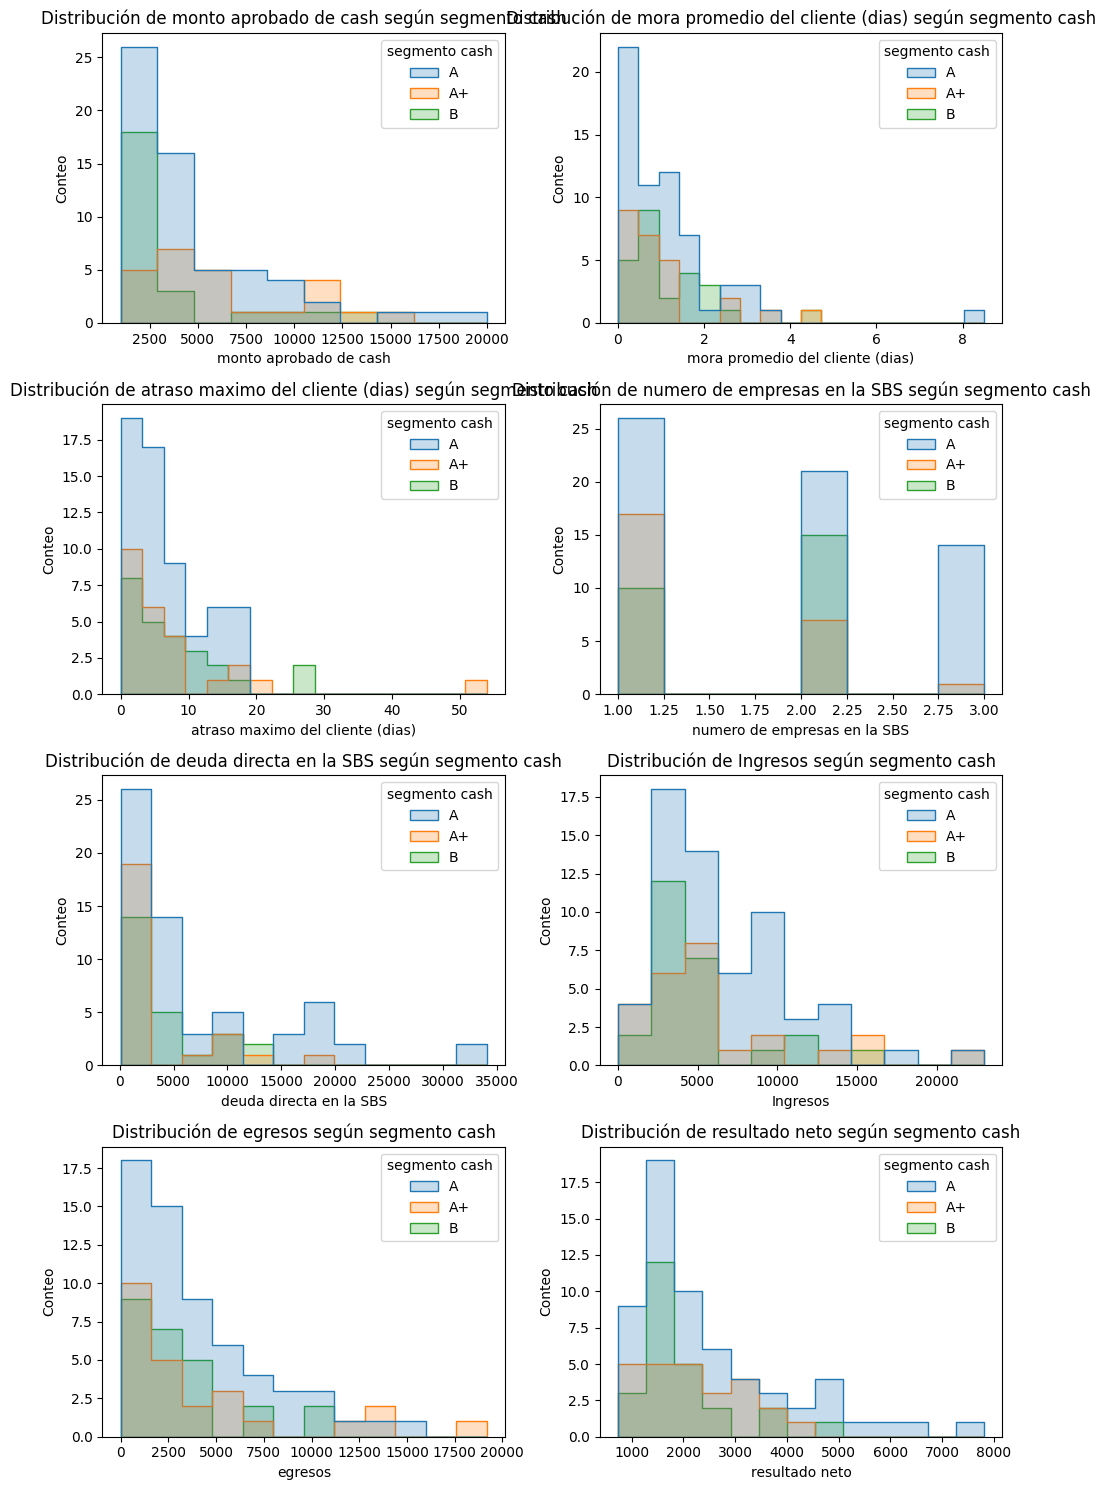

In [12]:
# Definir las variables importantes y la variable objetivo
variables_importantes = [
    "monto aprobado de cash", "mora promedio del cliente (dias)", 
    "atraso maximo del cliente (dias)", "numero de empresas en la SBS", 
    "deuda directa en la SBS", "Ingresos", "egresos", "resultado neto"
]
objetivo = 'segmento cash'

# Configuración de la visualización
plt.figure(figsize=(10, 15))

# Generar gráficos para cada variable importante
for i, variable in enumerate(variables_importantes, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data=df, x=variable, hue=objetivo, element='step', stat='count', common_norm=False)
    plt.title(f"Distribución de {variable} según {objetivo}")
    plt.xlabel(variable)
    plt.ylabel("Conteo")

plt.tight_layout()
plt.show()

### Monto aprobado de cash:

- A+ (Muy buen cliente): Tienden a tener montos aprobados altos, mostrando que el banco confía en su capacidad de pago.
- A (Buen cliente): Predominan montos aprobados medios a bajos, lo que indica confianza moderada.
- B (Observado): Montos generalmente bajos, posiblemente por el riesgo percibido.

### Mora promedio del cliente (días):

- A+: Tienen mora promedio muy baja, demostrando puntualidad en sus pagos.
- A: Mora promedio baja, aunque con algunos clientes con mora leve.
- B: Mora promedio más alta y variada, lo cual justifica su estado de observación.

### Atraso máximo del cliente (días):

- A+: Los atrasos máximos son bajos, indicando un historial de pagos confiable.
- A: Atrasos máximos un poco mayores que A+, pero en su mayoría bajos.
- B: Tienen atrasos máximos altos en algunos casos, lo cual indica problemas en su comportamiento de pago.

### Número de empresas en la SBS:

- A+: Usualmente tienen una relación más limitada con empresas de la SBS, indicando una menor exposición a deudas múltiples.
- A: También están concentrados en una o dos empresas, pero algunos tienen hasta tres.
- B: Mayor variabilidad en el número de empresas, lo que podría reflejar una exposición más riesgosa.

### Deuda directa en la SBS:

- A+: Algunos clientes tienen deudas directas altas, pero se confía en su capacidad de pago.
- A: Deuda directa en rangos medios, lo cual es manejable.
- B: Deudas relativamente bajas, pero el riesgo se mantiene por otros factores como la mora.

### Ingresos:

- A+: Ingresos altos, mostrando solvencia económica.
- A: Ingresos medianos, suficiente para cubrir sus compromisos, aunque menores que en A+.
- B: Ingresos generalmente bajos, lo cual podría limitar su capacidad de pago.

### Egresos:

- A+: Egresos altos, pero balanceados con sus ingresos, lo que indica una situación financiera sólida.
- A: Egresos moderados, ajustados a sus ingresos.
- B: Egresos también bajos, pero sin el respaldo de ingresos altos, lo que podría ser un factor de riesgo.

### Resultado neto:

- A+: Resultado neto alto, indicando que mantienen un saldo positivo después de sus egresos.
- A: Resultado neto medio, mostrando que tienen estabilidad financiera.
- B: Resultado neto bajo, lo cual contribuye a que se mantengan en observación por posible falta de solvencia.

## Gráficos de Pares (Pair Plot)

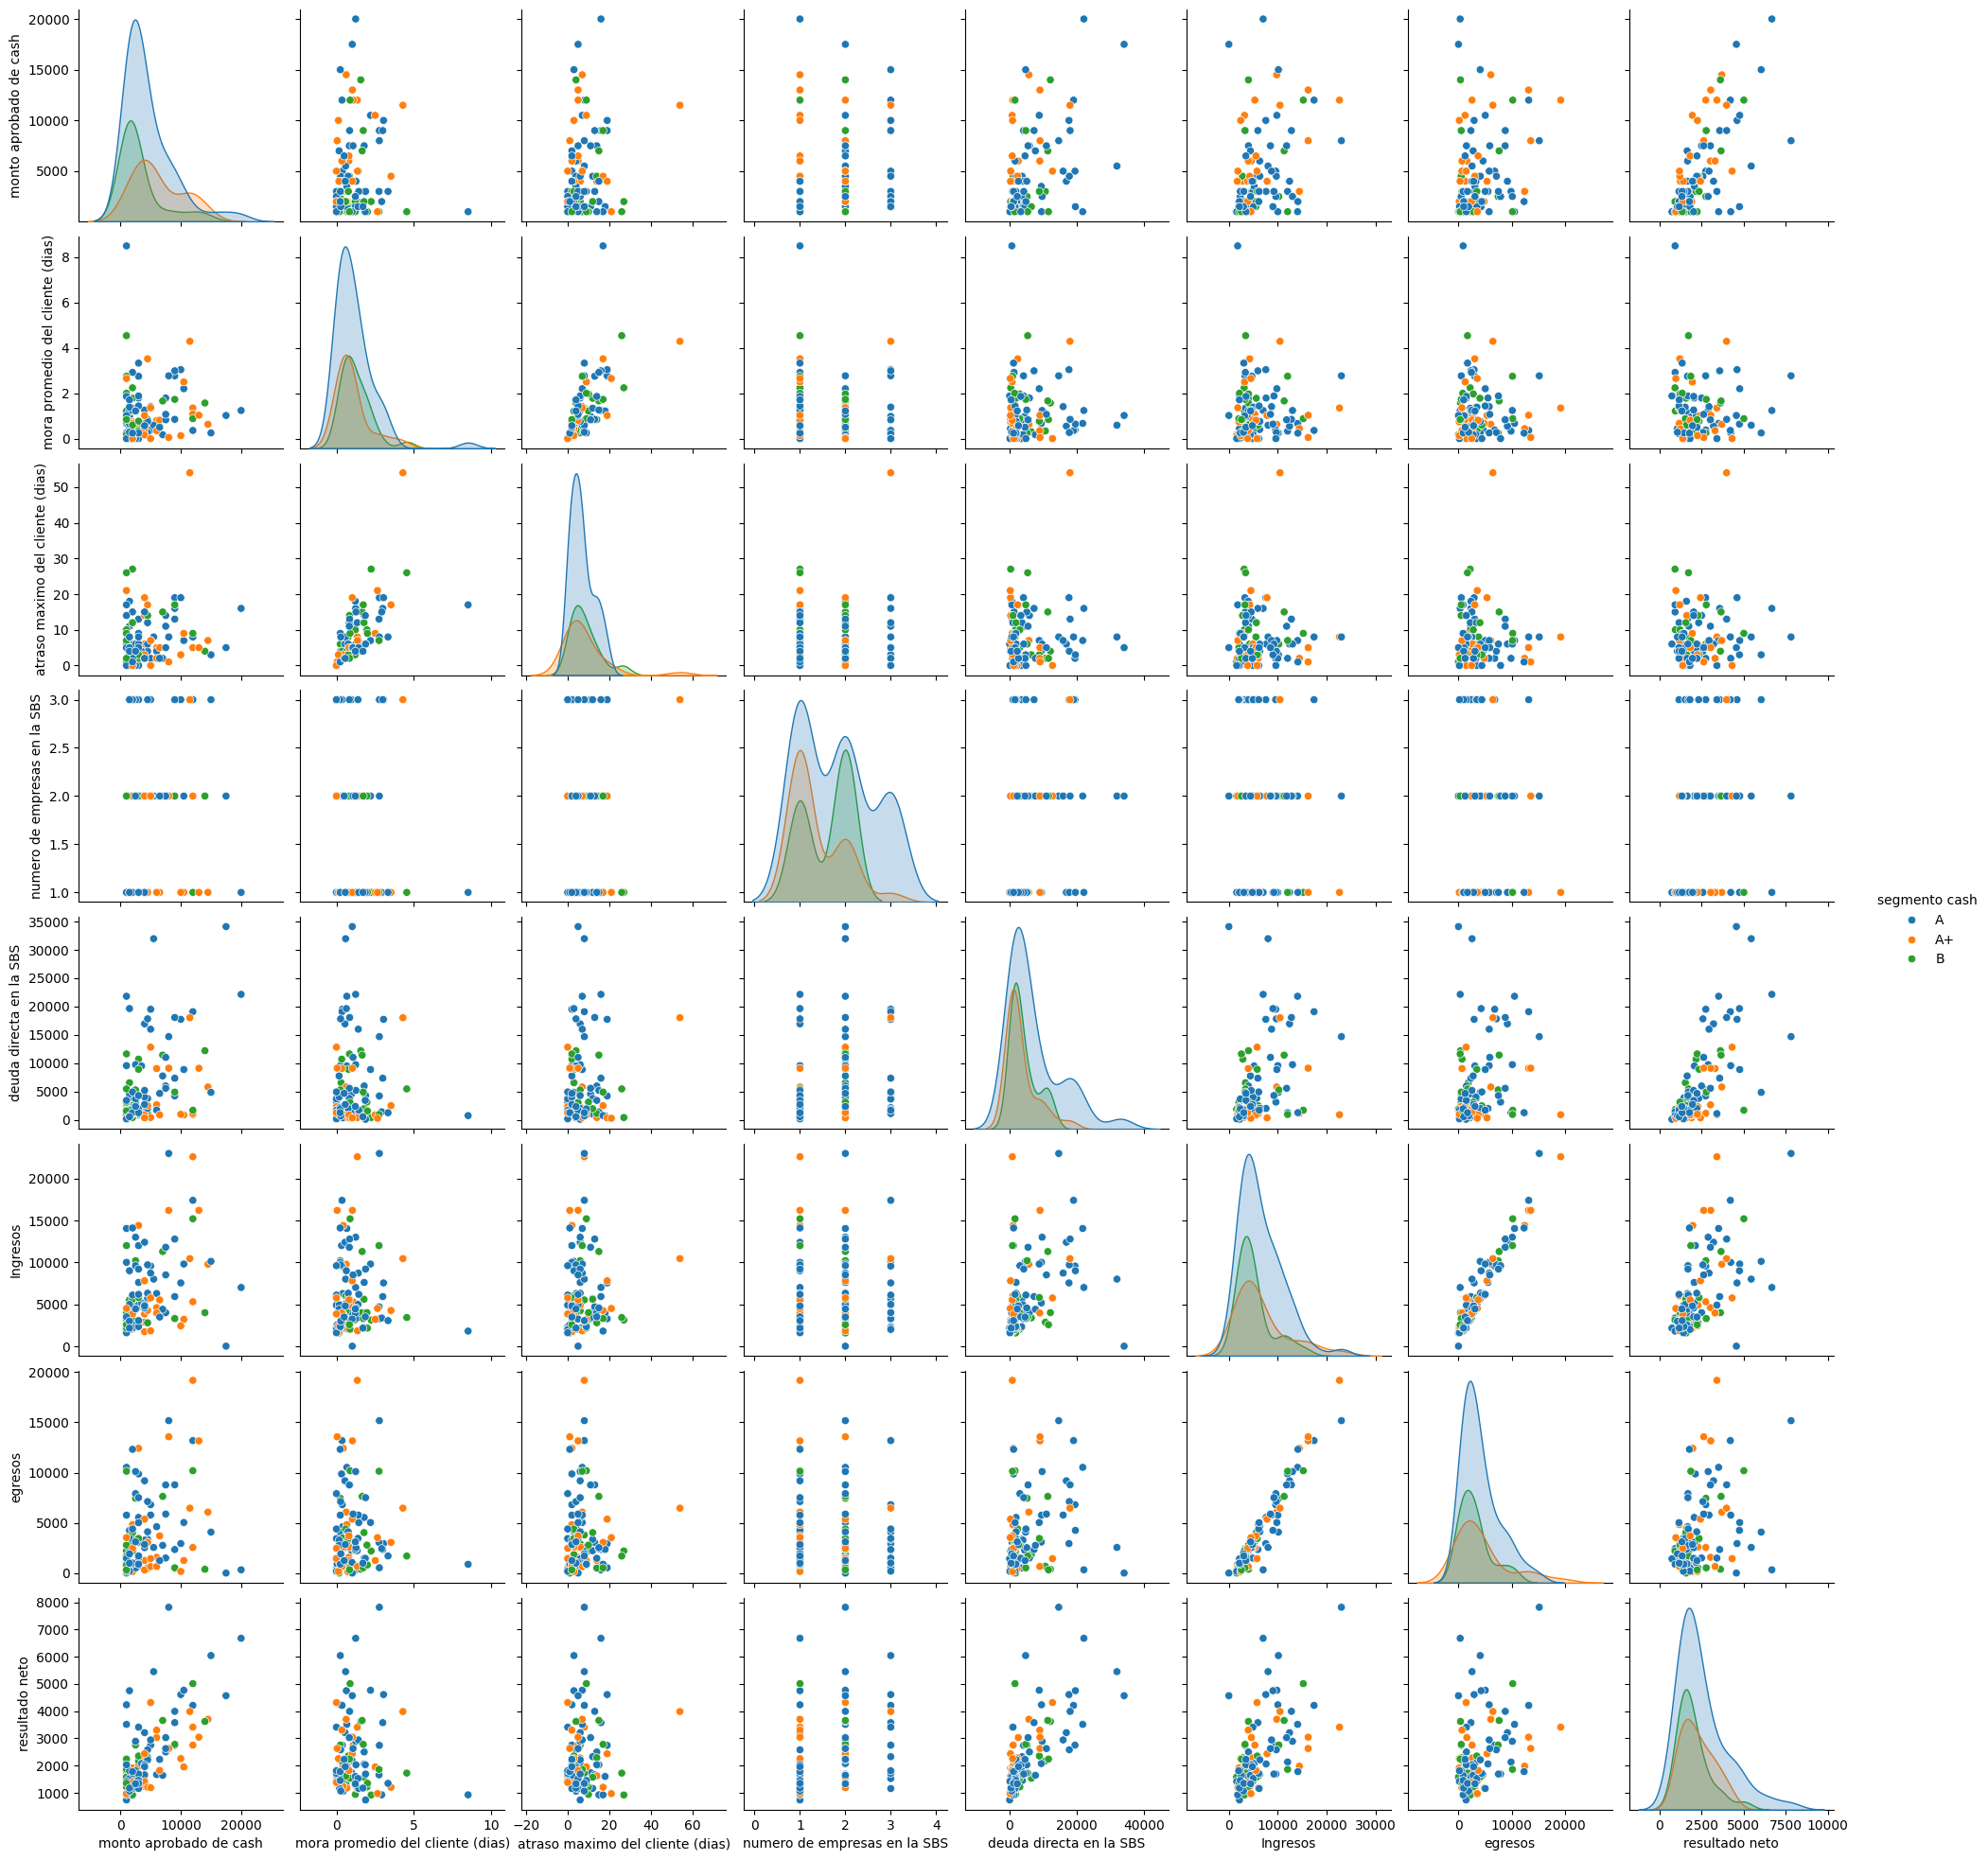

In [126]:
# Gráfico de pares
sns.pairplot(df[variables_importantes + [objetivo]], hue=objetivo, diag_kind='kde')
plt.show()

### Monto aprobado de cash vs. Variables Financieras:
- Los clientes A+ tienden a tener montos de cash aprobados más altos, especialmente cuando tienen ingresos y resultados netos elevados.
- Los clientes B, con menor monto aprobado de cash, suelen tener ingresos y resultados netos más bajos.
### Mora promedio y Atraso máximo:
- La mora promedio y el atraso máximo son bajos en los clientes A+, mientras que los clientes B muestran mayor dispersión en estas métricas, justificando su estado de observación.
### Deuda Directa y Número de Empresas en la SBS:
- Los clientes A+ tienden a estar asociados a un menor número de empresas en la SBS, aunque algunos tienen deudas altas. Los clientes B presentan mayor dispersión en el número de empresas, lo que podría reflejar mayor riesgo.
### Ingresos y Egresos:
- Los ingresos y egresos están alineados entre los clientes A y A+, pero los clientes A+ tienen mayores egresos e ingresos en general, manteniendo su solvencia.
- Los clientes B tienden a tener ingresos y egresos más bajos, afectando su capacidad de pago.

## Gráficos de Densidad por Categoría
Podemos crear gráficos de densidad para cada variable importante, agrupados por la variable objetivo.


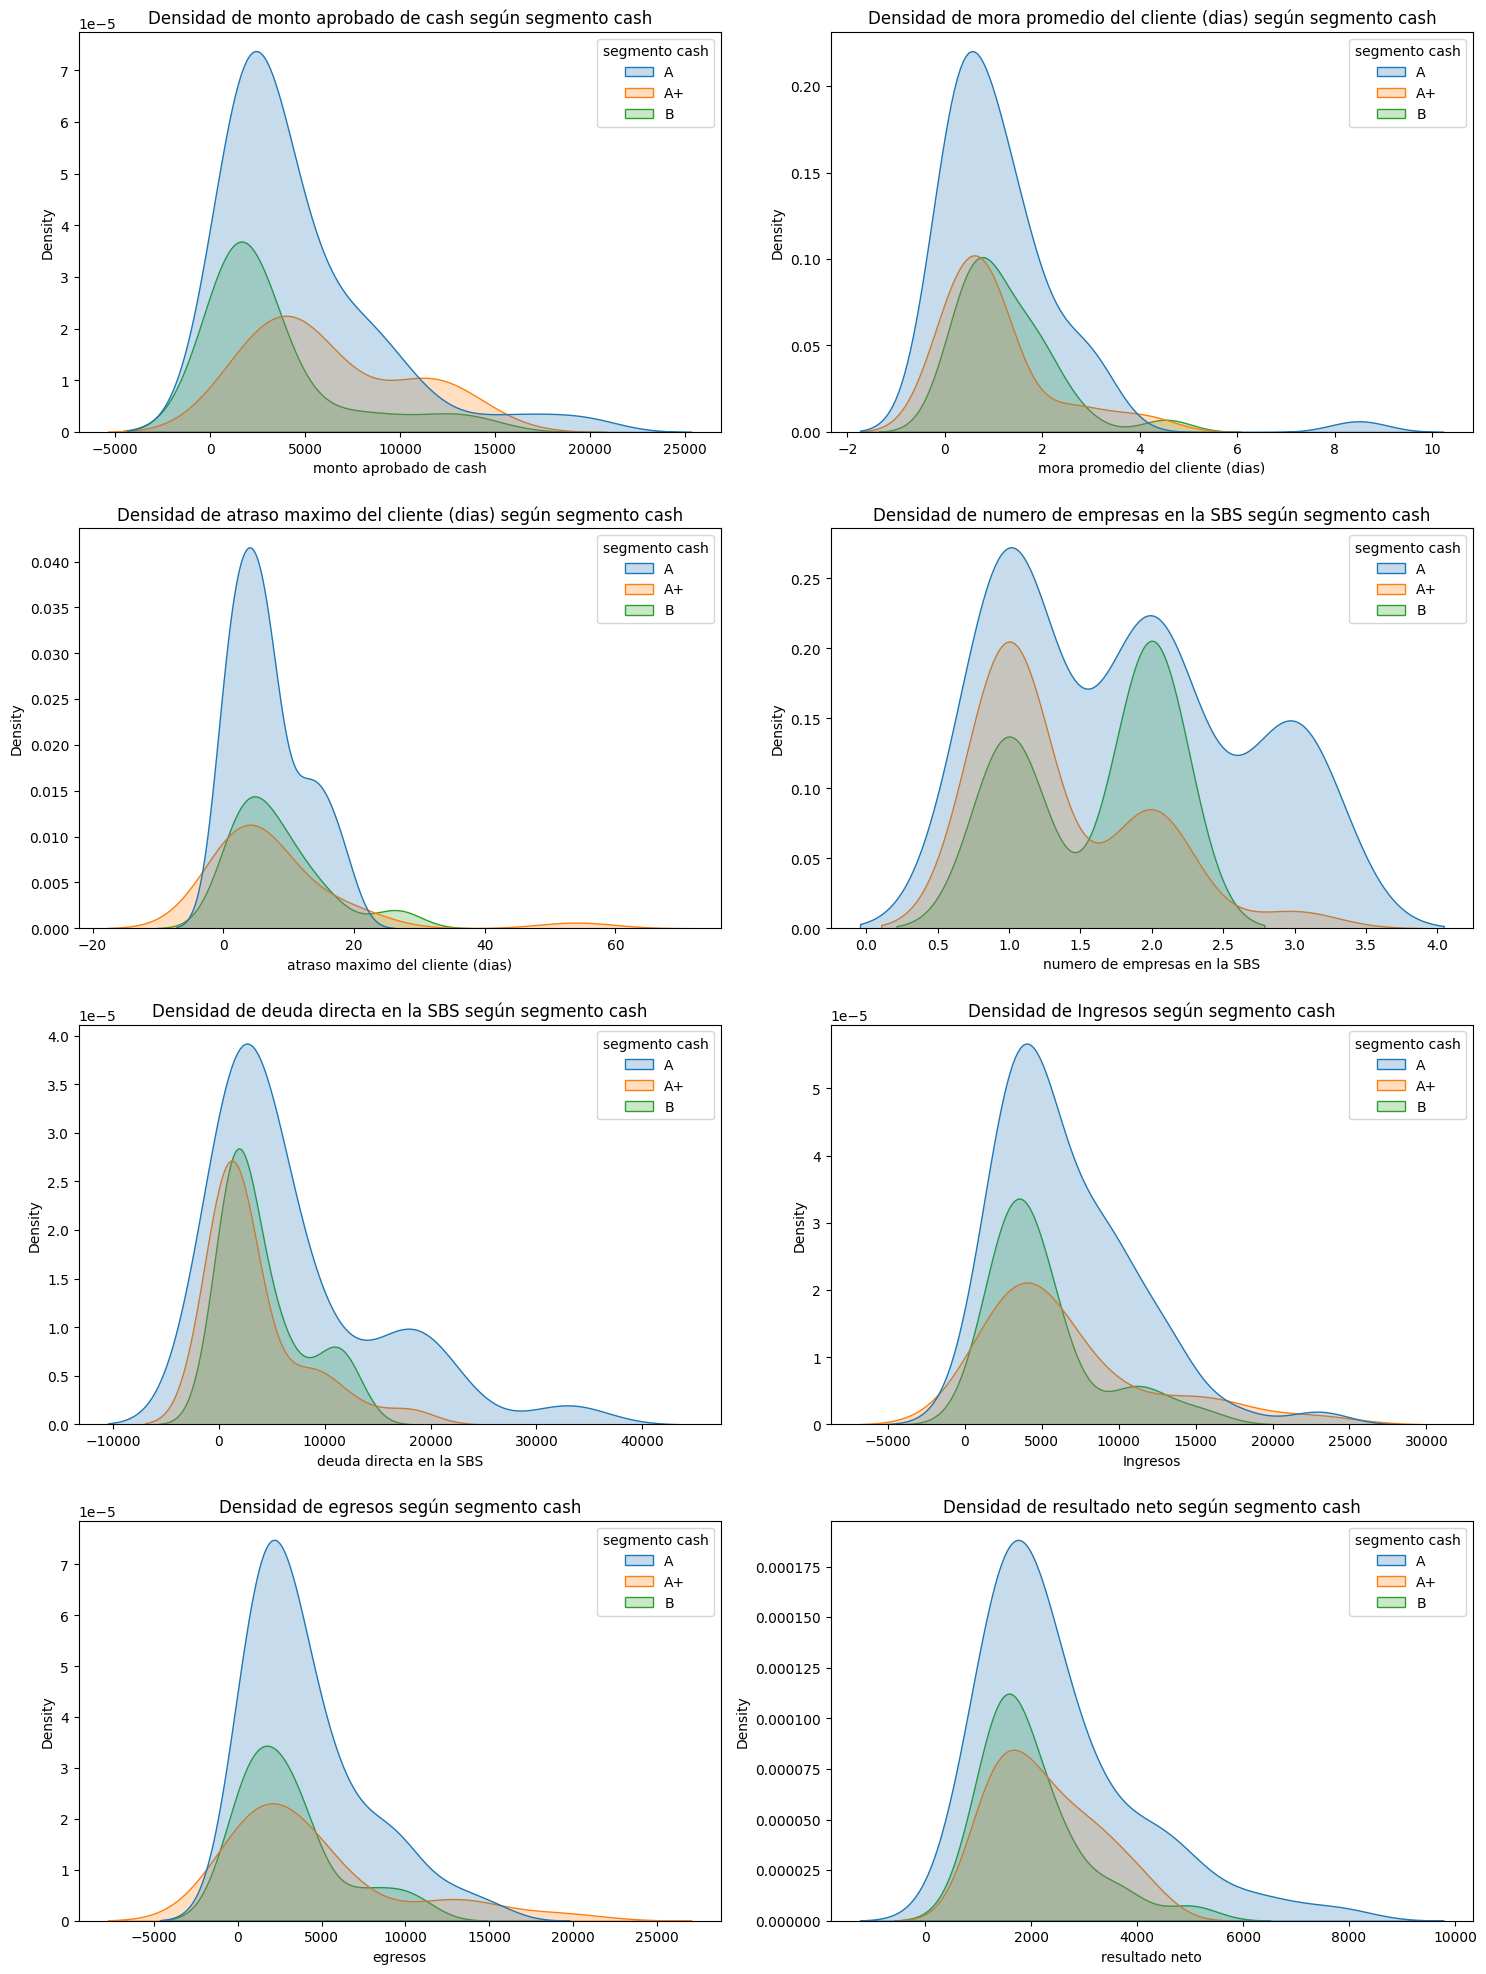

In [127]:
# Configuración de subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

for idx, variable in enumerate(variables_importantes):
    sns.kdeplot(data=df, x=variable, hue=objetivo, ax=axes[idx], fill=True)
    axes[idx].set_title(f'Densidad de {variable} según {objetivo}')

plt.tight_layout()
plt.show()

1. **Monto aprobado de cash**:
   - Los clientes A tienen mayor densidad en montos bajos.
   - Los clientes A+ tienen montos de cash más altos.
   - Los clientes B están distribuidos en valores más bajos que A y A+.

2. **Mora promedio del cliente (días)**:
   - Los clientes A tienen la menor densidad de mora promedio.
   - Los clientes A+ y B tienen una distribución algo similar, aunque B presenta una leve extensión hacia moras más altas.

3. **Atraso máximo del cliente (días)**:
   - Los clientes A tienen atrasos máximos bajos.
   - Los clientes B muestran atrasos máximos más altos que los de A y A+, confirmando el mayor riesgo en este segmento.

4. **Número de empresas en la SBS**:
   - Los clientes A suelen estar en una sola empresa.
   - Los clientes A+ tienen un rango más amplio, con una ligera concentración en dos empresas.
   - Los clientes B tienen una mayor presencia en empresas múltiples.

5. **Deuda directa en la SBS**:
   - Los clientes A tienen deudas bajas.
   - Los clientes A+ presentan una distribución más extendida hacia deudas más altas, posiblemente porque se confía en su capacidad de pago.
   - Los clientes B tienen un rango intermedio.

6. **Ingresos**:
   - Los clientes A+ tienen ingresos altos, seguidos de los A.
   - Los clientes B tienden a tener ingresos más bajos, lo cual justifica su estado de observación.

7. **Egresos**:
   - La distribución de egresos es similar a los ingresos, con A+ mostrando los valores más altos, seguido de A y B.

8. **Resultado neto**:
   - Los clientes A+ tienen el resultado neto más alto.
   - Los clientes A presentan un resultado neto moderado.
   - Los clientes B tienen resultados netos más bajos, lo cual puede limitar su capacidad de pago.


## Gráficos Q-Q (Quantile-Quantile) para verificar la normalidad

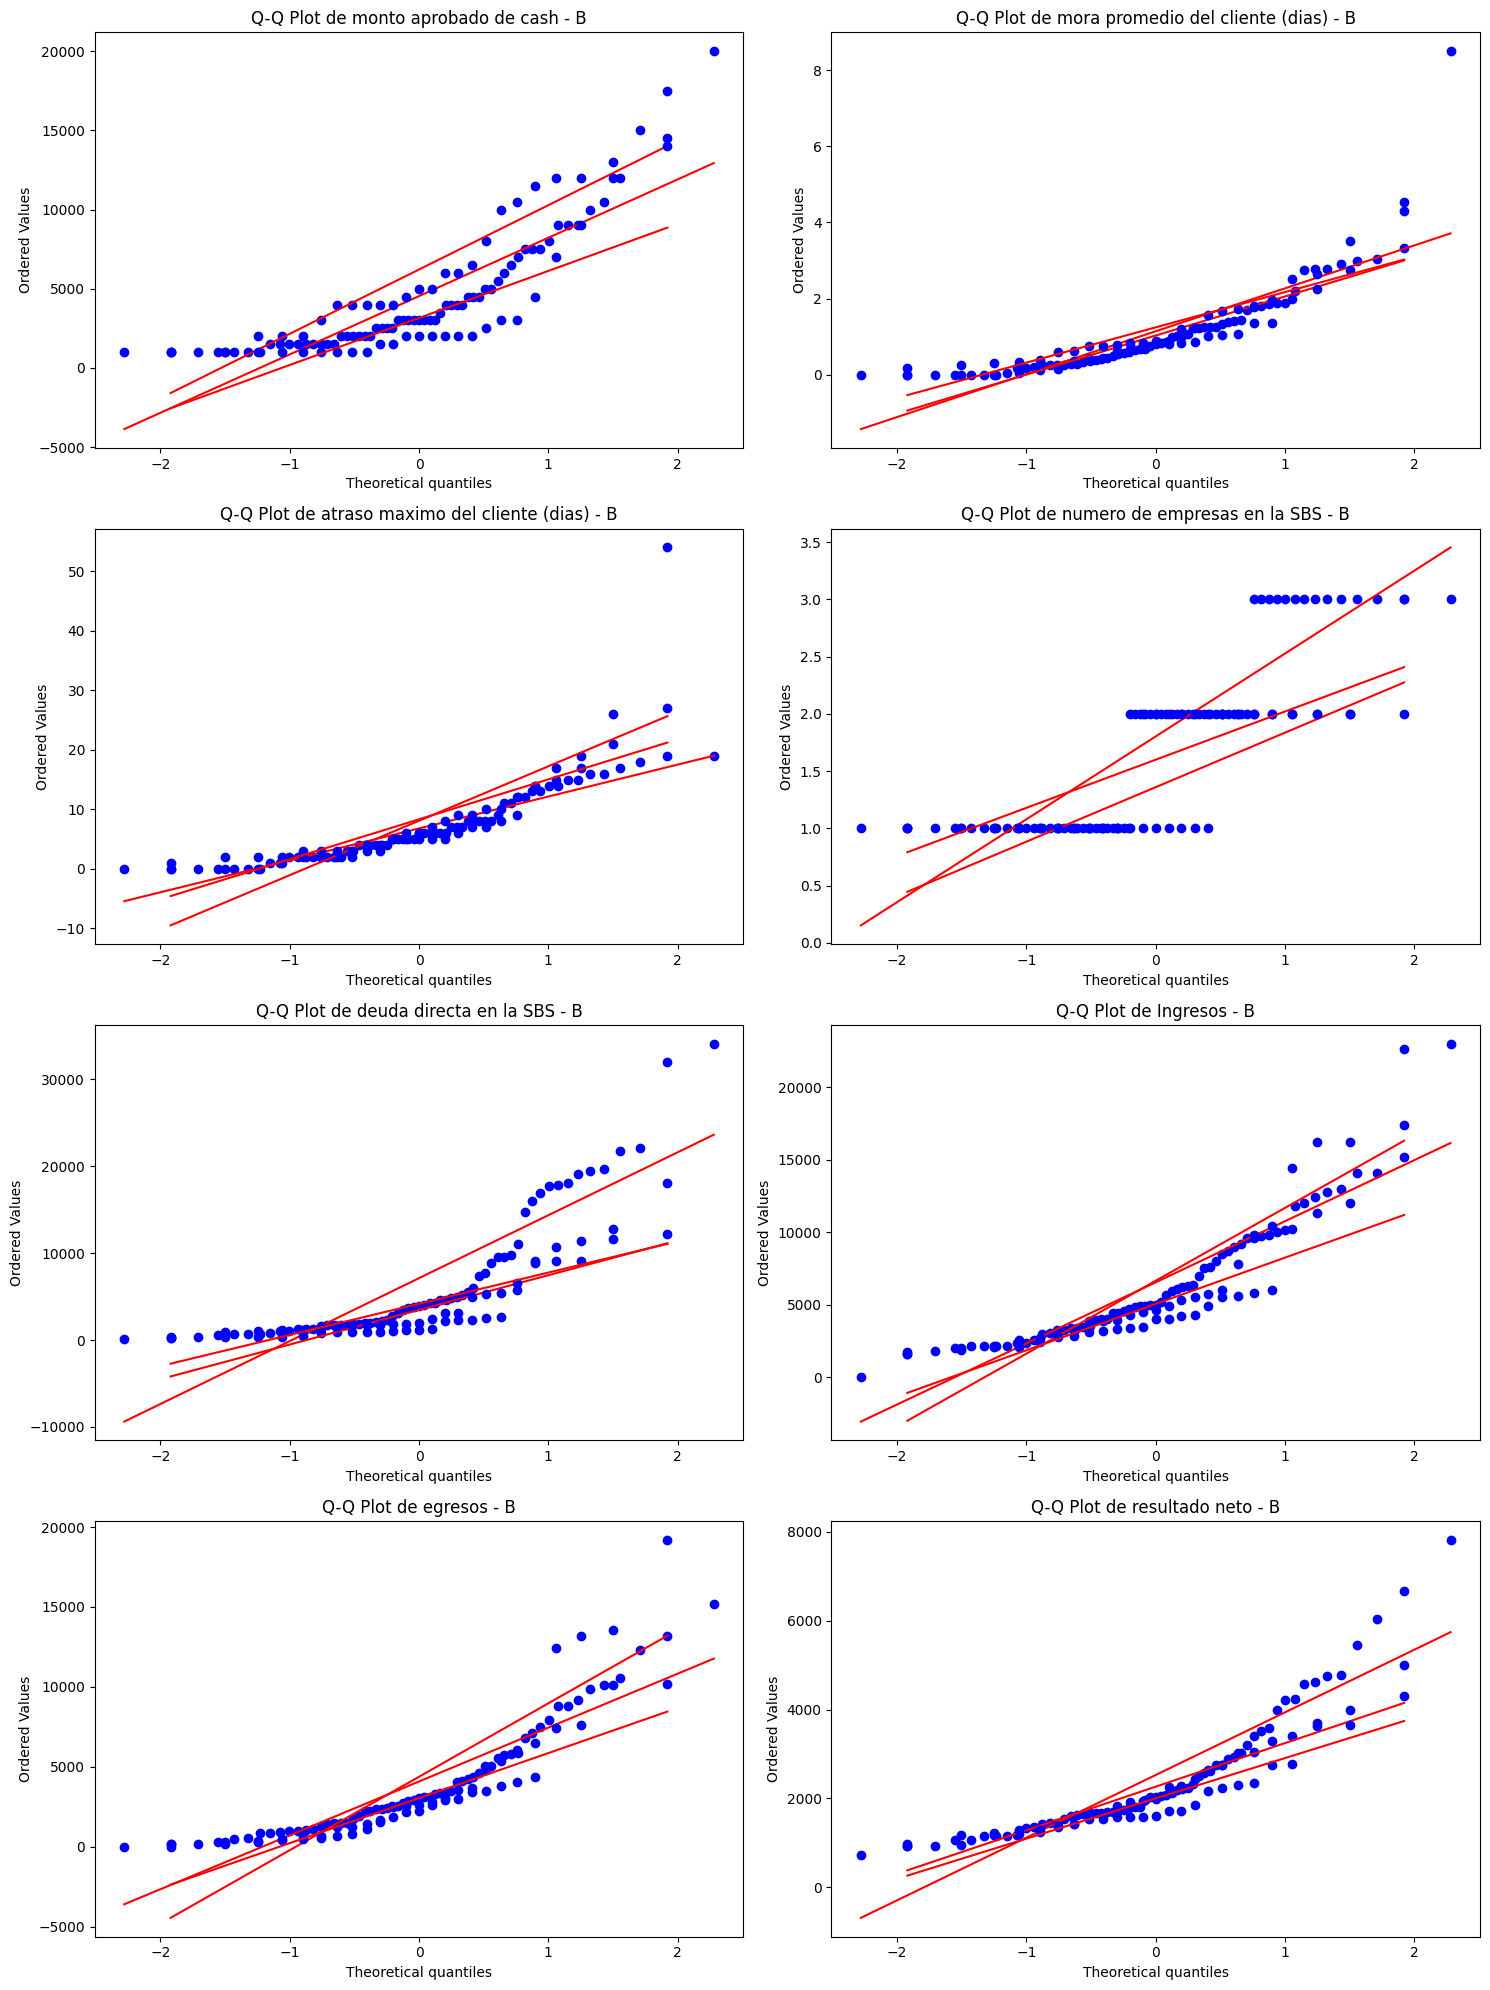

In [128]:
import scipy.stats as stats

# Convertir 'segmento cash' a categórico si es necesario
df[objetivo] = df[objetivo].astype('category')

# Configuración de subplots para gráficos Q-Q
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

# Graficar Q-Q para cada variable y cada categoría de segmento cash
for idx, variable in enumerate(variables_importantes):
    for cat in df[objetivo].cat.categories:
        subset = df[df[objetivo] == cat][variable]
        stats.probplot(subset, dist="norm", plot=axes[idx])
        axes[idx].set_title(f'Q-Q Plot de {variable} - {cat}')

plt.tight_layout()
plt.show()

1. **Monto aprobado de cash**:
   - Desviaciones notables de la normalidad en montos altos, indicando que la distribución es asimétrica.

2. **Mora promedio del cliente (días)**:
   - Cerca de una distribución normal, aunque hay algunas desviaciones en los extremos.

3. **Atraso máximo del cliente (días)**:
   - Alta desviación en los valores superiores, lo que muestra que algunos clientes tienen atrasos extremos.

4. **Número de empresas en la SBS**:
   - No sigue una distribución normal; los datos están concentrados en pocos valores discretos.

5. **Deuda directa en la SBS**:
   - Desviación considerable de la normalidad en valores altos, sugiriendo asimetría.

6. **Ingresos**:
   - No se ajusta completamente a la normalidad, especialmente en valores altos, lo que indica variabilidad.

7. **Egresos**:
   - Similar a los ingresos, con desviaciones en los valores altos que reflejan una distribución sesgada.

8. **Resultado neto**:
   - Se observan desviaciones en valores altos, indicando que la distribución no es completamente normal.

### Podemos aplicar el test de Shapiro-Wilk para verificar la normalidad de las variables numéricas en el conjunto de datos.

In [13]:
from scipy.stats import shapiro

# Aplicar el test de Shapiro-Wilk en cada variable numérica por segmento
for variable in variables_importantes:
    for cat in df[objetivo].unique():
        data_segment = df[df[objetivo] == cat][variable]
        stat, p_value = shapiro(data_segment)
        print(f"{variable} - Segmento {cat}: p-value = {p_value:.4f}")

monto aprobado de cash - Segmento A: p-value = 0.0000
monto aprobado de cash - Segmento A+: p-value = 0.0243
monto aprobado de cash - Segmento B: p-value = 0.0000
mora promedio del cliente (dias) - Segmento A: p-value = 0.0000
mora promedio del cliente (dias) - Segmento A+: p-value = 0.0002
mora promedio del cliente (dias) - Segmento B: p-value = 0.0013
atraso maximo del cliente (dias) - Segmento A: p-value = 0.0004
atraso maximo del cliente (dias) - Segmento A+: p-value = 0.0000
atraso maximo del cliente (dias) - Segmento B: p-value = 0.0010
numero de empresas en la SBS - Segmento A: p-value = 0.0000
numero de empresas en la SBS - Segmento A+: p-value = 0.0000
numero de empresas en la SBS - Segmento B: p-value = 0.0000
deuda directa en la SBS - Segmento A: p-value = 0.0000
deuda directa en la SBS - Segmento A+: p-value = 0.0000
deuda directa en la SBS - Segmento B: p-value = 0.0002
Ingresos - Segmento A: p-value = 0.0001
Ingresos - Segmento A+: p-value = 0.0002
Ingresos - Segmento B: 

### Interpretación de los resultados
- Variables con p-valor < 0.05: Indica que no siguen una distribución normal en ese segmento, ya que rechazamos la hipótesis de normalidad.
- Variables con p-valor > 0.05: Sugeriría que siguen una distribución normal en ese segmento (aunque en este caso, solo el "resultado neto" en el segmento A+ tiene un p-valor mayor a 0.05, 0.1286).

### Dado que la mayoría de las variables no son normales, podríamos aplicar transformaciones que ayuden a acercarlas a la normalidad.

## Aplicar Transformaciones
Existen varias transformaciones que podemos probar. Las más comunes para mejorar la normalidad son la transformación logarítmica, la raíz cuadrada y la transformación Box-Cox.

In [14]:
import numpy as np
from scipy.stats import boxcox

# Aplicar transformaciones a las variables importantes
for variable in variables_importantes:
    # Si la variable tiene solo valores positivos, aplicamos la transformación Box-Cox
    if (df[variable] > 0).all():
        # Transformación Box-Cox
        df[variable], _ = boxcox(df[variable])
    else:
        # Si tiene ceros o valores negativos, usamos la transformación logarítmica
        df[variable] = np.log1p(df[variable])  # log1p maneja valores de 0 en adelante


## Verificar la Normalidad Después de la Transformación
Después de aplicar las transformaciones, puedes usar el test de Shapiro-Wilk nuevamente para verificar si las variables transformadas se acercan a una distribución normal.

In [15]:
from scipy.stats import shapiro

# Aplicar el test de Shapiro-Wilk en cada variable transformada
print("Resultados del Test de Shapiro-Wilk después de la transformación:")
for variable in variables_importantes:
    stat, p_value = shapiro(df[variable])
    print(f"{variable}: p-value = {p_value:.4f}")


Resultados del Test de Shapiro-Wilk después de la transformación:
monto aprobado de cash: p-value = 0.0003
mora promedio del cliente (dias): p-value = 0.0015
atraso maximo del cliente (dias): p-value = 0.0040
numero de empresas en la SBS: p-value = 0.0000
deuda directa en la SBS: p-value = 0.1885
Ingresos: p-value = 0.0000
egresos: p-value = 0.0000
resultado neto: p-value = 0.7448


- La **transformación logaritmica** y la **transformación Box-Cox** ayudaron a mejorar la normalidad en varias variables y segmentos.
- Aún así, algunas variables, como el **número de empresas en la SBS** y ciertas transformaciones en el segmento **B**, no lograron alcanzar la normalidad.
- Para el LDA, podríamos usar las variables transformadas que muestran p-valores > 0.05.

## Visualizar las Transformaciones
Puedes visualizar la forma de las distribuciones después de la transformación para comparar con la distribución original. Esto te ayudará a observar visualmente si la transformación logró normalizar los datos.

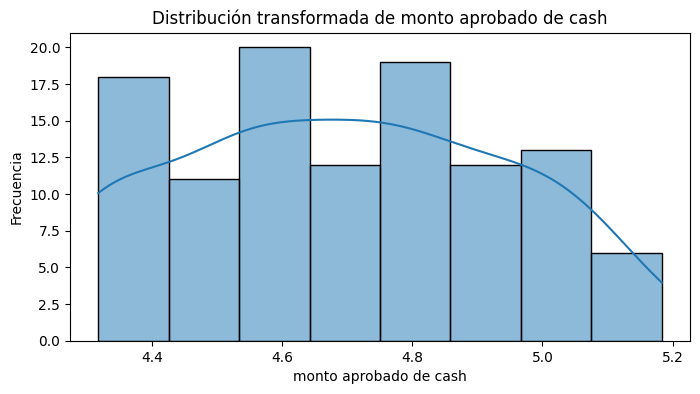

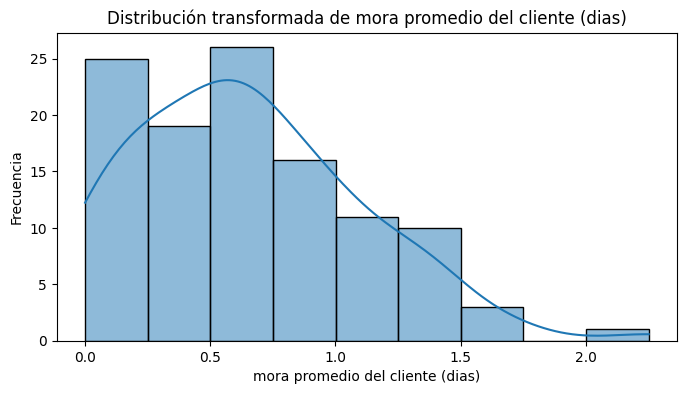

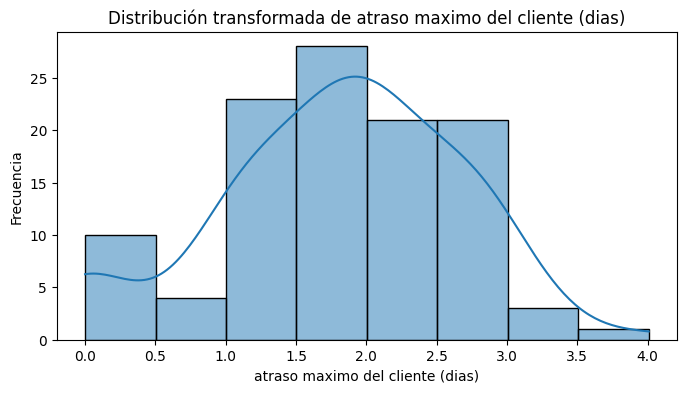

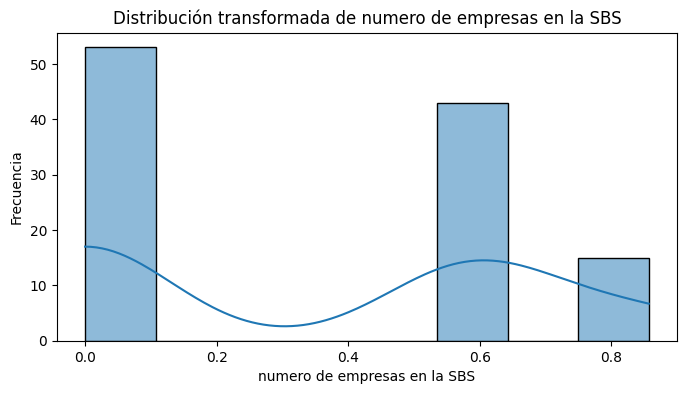

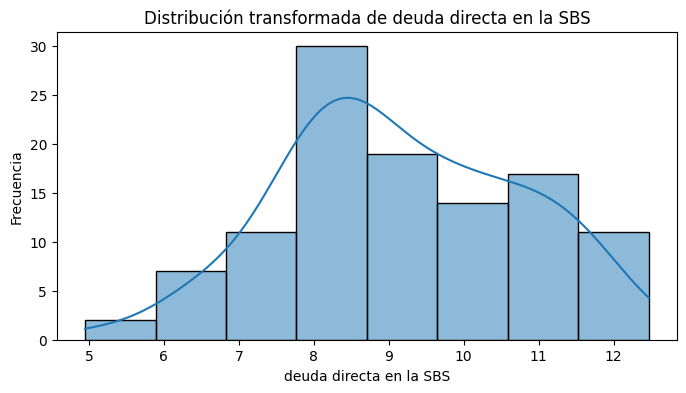

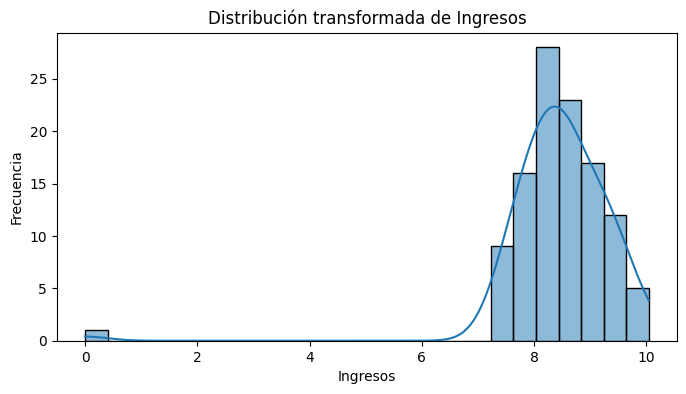

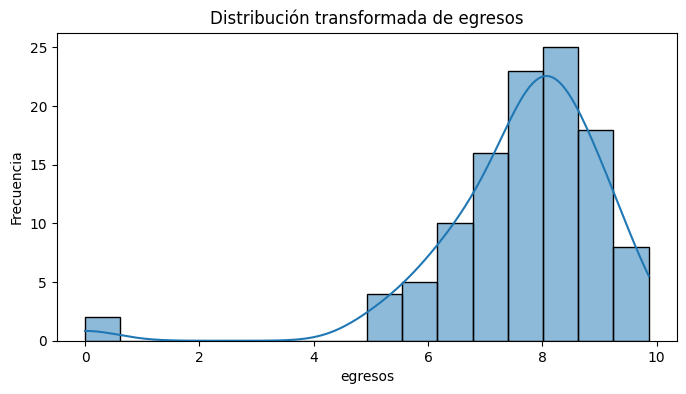

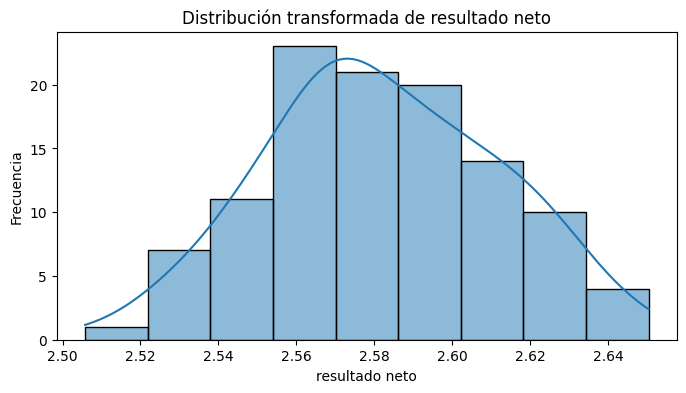

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar distribuciones después de las transformaciones
for variable in variables_importantes:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[variable], kde=True)
    plt.title(f'Distribución transformada de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()


In [17]:
import pingouin as pg

# Realizar la prueba de normalidad multivariante con el método de Mardia
mardia_test = pg.multivariate_normality(df[variables_importantes], alpha=0.05)
print("Mardia Test:", mardia_test)

Mardia Test: HZResults(hz=1.3929159730542047, pval=3.9860621987622267e-48, normal=False)


me sigue saliendo que no cumple con la normalidad

## Eliminar Outliers

In [18]:
# Identificar y eliminar outliers usando el rango intercuartílico (IQR)
for variable in variables_importantes:
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir los límites inferior y superior
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Filtrar los datos para eliminar los outliers
    df = df[(df[variable] >= lower_limit) & (df[variable] <= upper_limit)]

print("Outliers eliminados. Nuevas dimensiones del conjunto de datos:", df.shape)


Outliers eliminados. Nuevas dimensiones del conjunto de datos: (108, 10)


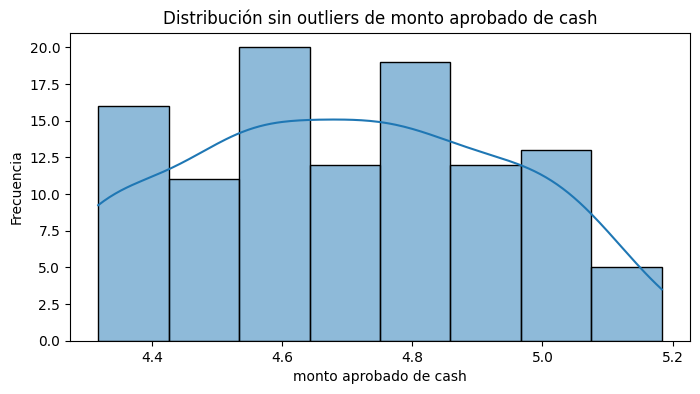

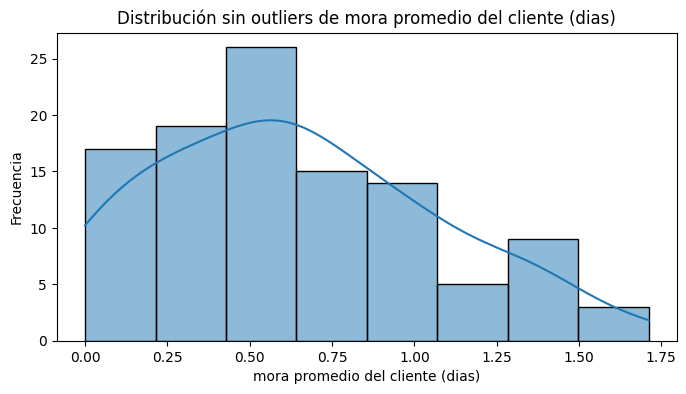

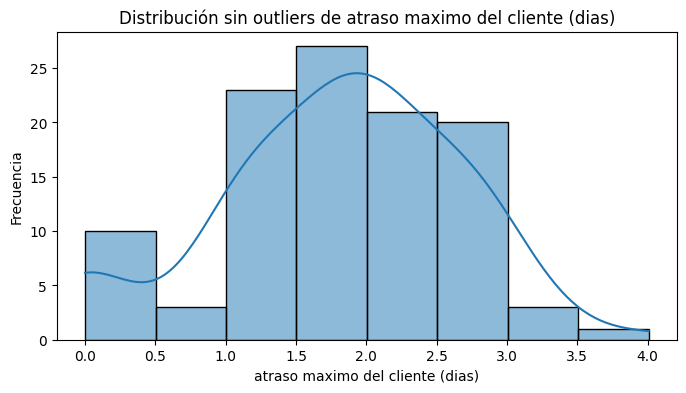

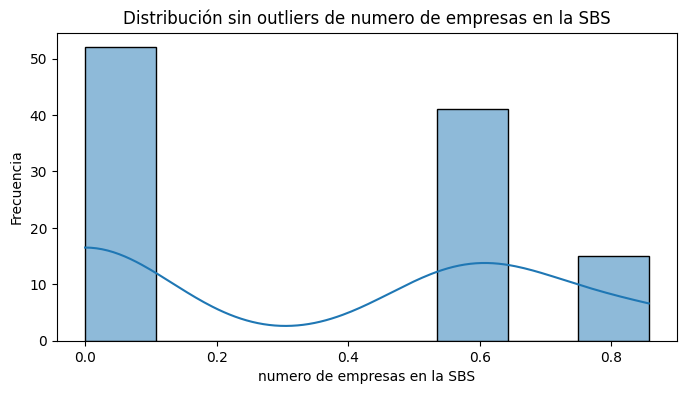

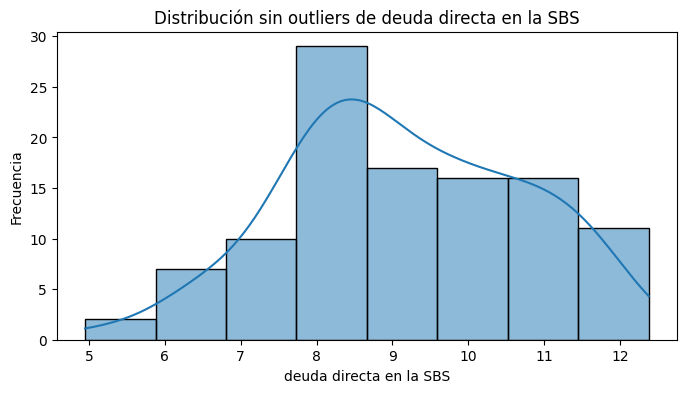

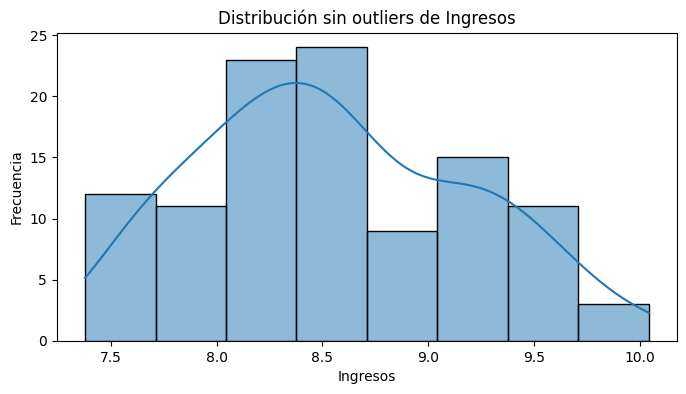

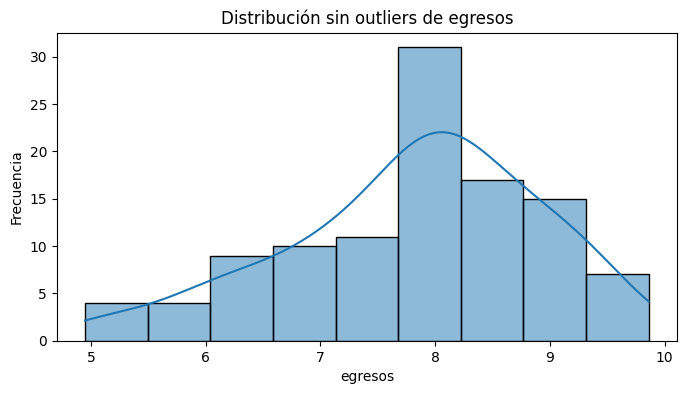

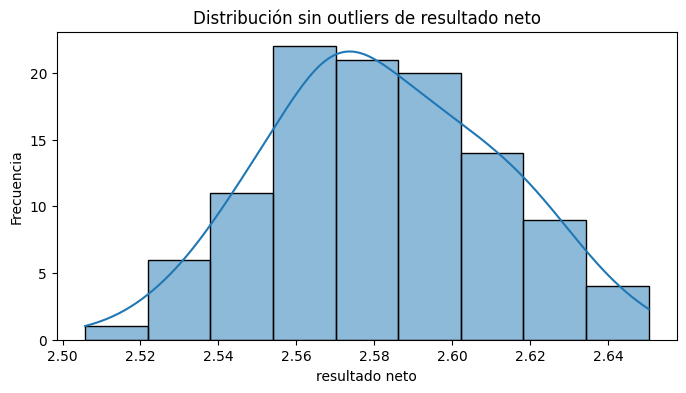

In [19]:
# Visualizar distribuciones sin outliers
for variable in variables_importantes:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[variable], kde=True)
    plt.title(f'Distribución sin outliers de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()


In [20]:
import pingouin as pg

# Realizar la prueba de normalidad multivariante con el método de Mardia
mardia_test = pg.multivariate_normality(df[variables_importantes], alpha=0.05)
print("Mardia Test:", mardia_test)

Mardia Test: HZResults(hz=1.169094230922, pval=3.804818517737103e-15, normal=False)


In [21]:
from scipy.stats import boxcox
import numpy as np

# Aplicar transformaciones a las variables que lo necesiten
for variable in ["monto aprobado de cash", "deuda directa en la SBS", "Ingresos", "egresos", "resultado neto"]:
    # Si la variable tiene solo valores positivos, aplicar Box-Cox
    if (df[variable] > 0).all():
        df[variable], _ = boxcox(df[variable])
    else:
        # Si no es positivo, aplicar logaritmo natural
        df[variable] = np.log1p(df[variable])

# Aplicar raíz cuadrada a las variables que necesitan una transformación menos agresiva
for variable in ["mora promedio del cliente (dias)", "atraso maximo del cliente (dias)"]:
    df[variable] = np.sqrt(df[variable])


Resultados del Test de Shapiro-Wilk después de la nueva transformación:
monto aprobado de cash: p-value = 0.0005
mora promedio del cliente (dias): p-value = 0.0001
atraso maximo del cliente (dias): p-value = 0.0000
numero de empresas en la SBS: p-value = 0.0000
deuda directa en la SBS: p-value = 0.1482
Ingresos: p-value = 0.1313
egresos: p-value = 0.3995
resultado neto: p-value = 0.8790


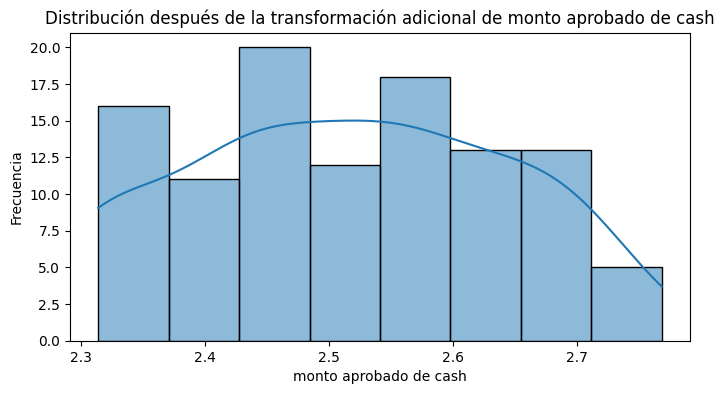

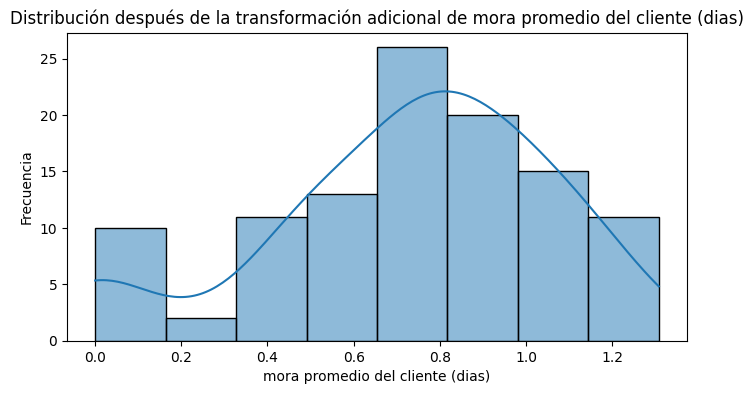

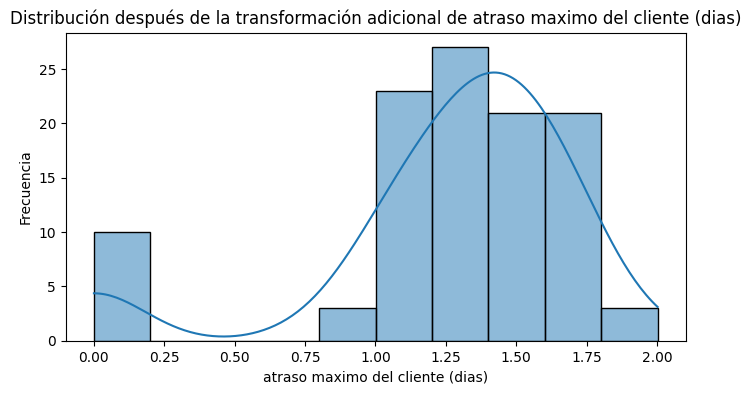

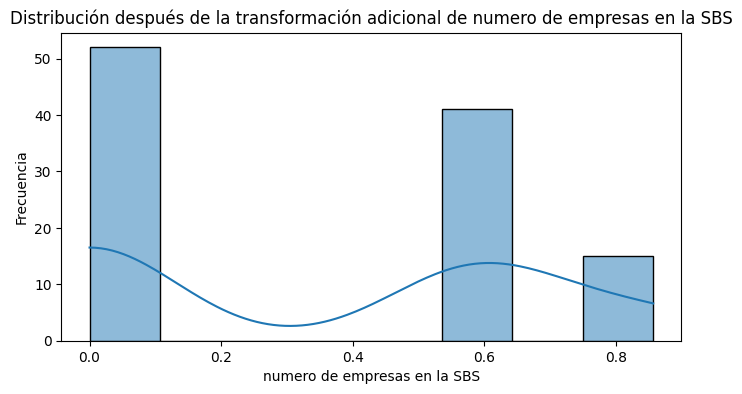

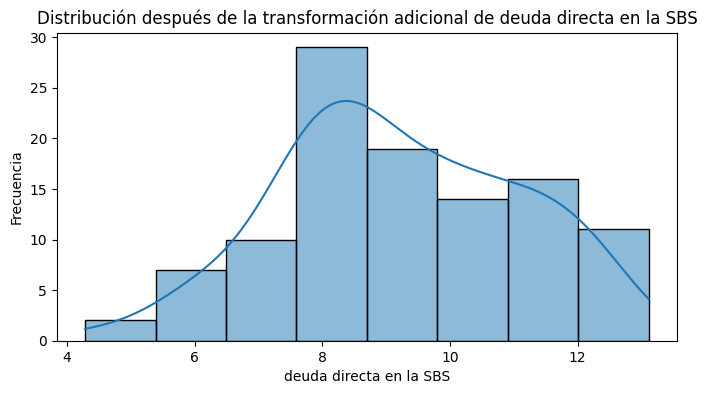

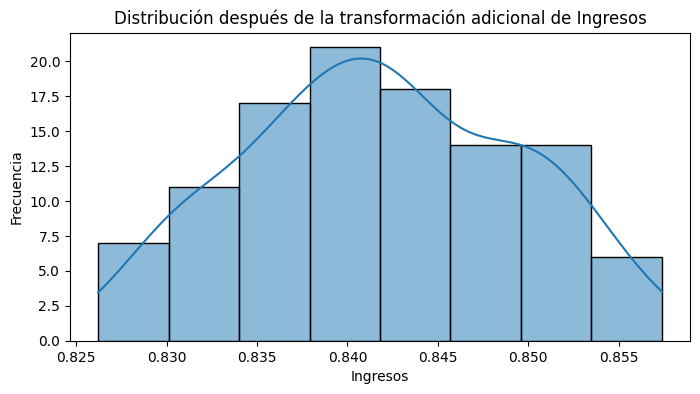

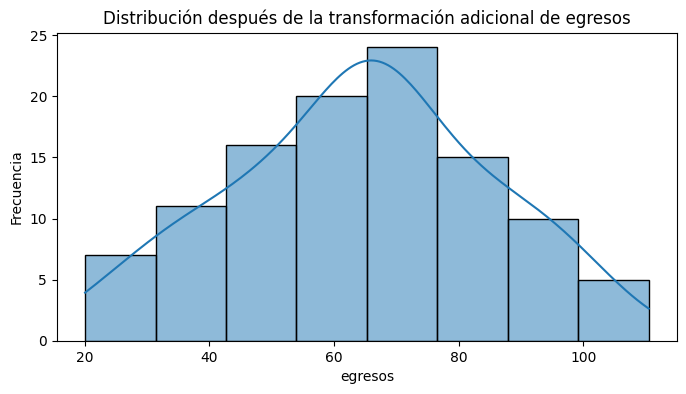

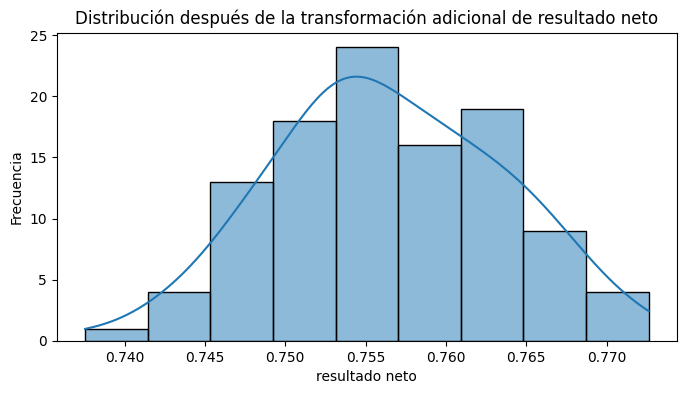

In [22]:
# Verificación con el test de Shapiro-Wilk
from scipy.stats import shapiro

print("Resultados del Test de Shapiro-Wilk después de la nueva transformación:")
for variable in variables_importantes:
    stat, p_value = shapiro(df[variable])
    print(f"{variable}: p-value = {p_value:.4f}")

# Visualización de las distribuciones transformadas
import seaborn as sns
import matplotlib.pyplot as plt

for variable in variables_importantes:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[variable], kde=True)
    plt.title(f'Distribución después de la transformación adicional de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()


In [23]:
df.head()

,Unnamed: 0,segmento cash,monto aprobado de cash,mora promedio del cliente (dias),atraso maximo del cliente (dias),numero de empresas en la SBS,deuda directa en la SBS,Ingresos,egresos,resultado neto
0,0,A,2.390466,0.603857,1.268636,0.000000,6.011395,0.830851,47.527422,0.745362
1,1,A,2.390466,0.000000,0.000000,0.000000,9.633410,0.841744,68.953434,0.751196
2,2,A+,2.706524,0.924346,1.482304,0.000000,7.403285,0.857238,110.472576,0.763810
3,3,A,2.314115,0.716117,1.442027,0.590934,12.458253,0.852969,94.668708,0.764174
4,4,A,2.669262,1.151987,1.730818,0.856694,9.760085,0.836671,36.237575,0.760981


In [24]:
#elimino la columna 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

df.head()

,segmento cash,monto aprobado de cash,mora promedio del cliente (dias),atraso maximo del cliente (dias),numero de empresas en la SBS,deuda directa en la SBS,Ingresos,egresos,resultado neto
0,A,2.390466,0.603857,1.268636,0.000000,6.011395,0.830851,47.527422,0.745362
1,A,2.390466,0.000000,0.000000,0.000000,9.633410,0.841744,68.953434,0.751196
2,A+,2.706524,0.924346,1.482304,0.000000,7.403285,0.857238,110.472576,0.763810
3,A,2.314115,0.716117,1.442027,0.590934,12.458253,0.852969,94.668708,0.764174
4,A,2.669262,1.151987,1.730818,0.856694,9.760085,0.836671,36.237575,0.760981


In [25]:
mardia_test = pg.multivariate_normality(df[variables_importantes], alpha=0.05)
print("Mardia Test:", mardia_test)

Mardia Test: HZResults(hz=1.2432572483623865, pval=2.191415007254624e-24, normal=False)


In [28]:
from sklearn.preprocessing import StandardScaler

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Aplicar la estandarización solo a las variables importantes
df[variables_importantes] = scaler.fit_transform(df[variables_importantes])

# Verificar los primeros datos después de la estandarización
df.head()


,segmento cash,monto aprobado de cash,mora promedio del cliente (dias),atraso maximo del cliente (dias),numero de empresas en la SBS,deuda directa en la SBS,Ingresos,egresos,resultado neto
0,A,-0.962716,-0.374004,0.024501,-1.005290,-1.708936,-1.485702,-0.818340,-1.551681
1,A,-0.962716,-2.206018,-2.706701,-1.005290,0.228285,-0.017518,0.220026,-0.728340
2,A+,1.505439,0.598313,0.484498,-1.005290,-0.964489,2.070990,2.232161,1.051550
3,A,-1.558952,-0.033423,0.397787,0.725043,1.739141,1.495532,1.466261,1.102936
4,A,1.214449,1.288945,1.019516,1.503222,0.296036,-0.701258,-1.365478,0.652352


In [29]:
# Confirmar que las variables tienen media cercana a 0 y desviación estándar cercana a 1
df[variables_importantes].agg(['mean', 'std'])


,monto aprobado de cash,mora promedio del cliente (dias),atraso maximo del cliente (dias),numero de empresas en la SBS,deuda directa en la SBS,Ingresos,egresos,resultado neto
mean,-2.826957e-17,7.195890e-18,2.235866e-17,3.700743e-17,-2.081668e-17,-4.780127e-17,-1.850372e-17,2.569961e-17
std,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00


# Iniciamos con el entrenamiento

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Separar las variables predictoras y la variable objetivo

In [31]:
# Separar la variable objetivo (Y) y las variables predictoras (X)
X = df.drop("segmento cash", axis=1)
y = df["segmento cash"]

### Dividir el conjunto de datos en entrenamiento y prueba

In [32]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Aplicar el modelo LDA

In [33]:
# Inicializar y entrenar el modelo LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

### Hacer predicciones y evaluar el modelo

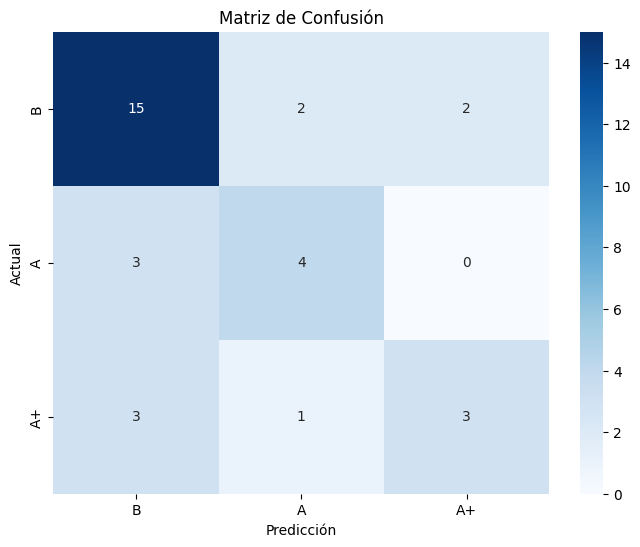

Reporte de clasificación:
               precision    recall  f1-score   support

           B       0.71      0.79      0.75        19
           A       0.57      0.57      0.57         7
          A+       0.60      0.43      0.50         7

    accuracy                           0.67        33
   macro avg       0.63      0.60      0.61        33
weighted avg       0.66      0.67      0.66        33



In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Realizar predicciones en el conjunto de prueba
y_pred = lda.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'A', 'A+'], yticklabels=['B', 'A', 'A+'])
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()

# Mostrar el reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_test, y_pred, target_names=['B', 'A', 'A+']))


El modelo tiene un 50% de precisión general. La clase B es la mejor predicha, con un F1-score de 0.59, mientras que las clases A y A+ tienen un bajo rendimiento (F1-scores de 0.40 y 0.38, respectivamente). Esto sugiere que el modelo tiene dificultades para diferenciar entre A y A+. Podrías considerar ajustar el modelo o probar otros métodos más robustos para mejorar la clasificación.

### Distribución de la Proyección del LDA

Creamos una visualización de la distribución de la proyección discriminante para ver cómo separa las clases.

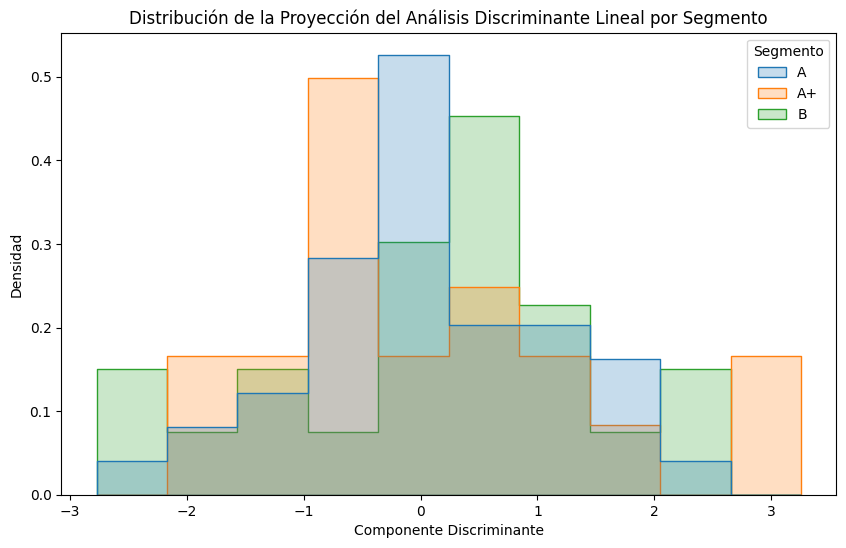

In [158]:
# Proyección sobre la dirección discriminante
lda_full = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda_full.fit_transform(X, y)

# Crear DataFrame para visualización
df_lda = pd.DataFrame(X_lda, columns=['Discriminante'])
df_lda['Segmento'] = y.replace({0: 'B', 1: 'A', 2: 'A+'})

# Visualizar la distribución de la proyección discriminante
plt.figure(figsize=(10, 6))
sns.histplot(data=df_lda, x='Discriminante', hue='Segmento', element='step', stat='density', common_norm=False)
plt.title("Distribución de la Proyección del Análisis Discriminante Lineal por Segmento")
plt.xlabel("Componente Discriminante")
plt.ylabel("Densidad")
plt.show()


# Clasificar nuevos clientes con datos aleatorios

Generaremos datos aleatorios para predecir el segmento de nuevos clientes

In [180]:
import numpy as np
import pandas as pd

# Definir los rangos de valores para cada variable (basado en la estructura de los datos de entrenamiento)
data_nuevos_clientes = {
    "monto aprobado de cash": np.random.randint(500, 20000, size=10),
    "mora promedio del cliente (dias)": np.random.uniform(0, 5, size=10),  # mora promedio en días
    "atraso maximo del cliente (dias)": np.random.randint(0, 30, size=10),  # atraso máximo en días
    "numero de empresas en la SBS": np.random.randint(1, 4, size=10),  # entre 1 y 3 empresas
    "deuda directa en la SBS": np.random.uniform(100, 30000, size=10),  # deuda directa en SBS
    "Ingresos": np.random.uniform(1000, 25000, size=10),  # rango de ingresos
    "egresos": np.random.uniform(500, 20000, size=10),  # rango de egresos
    "resultado neto": np.random.uniform(500, 8000, size=10)  # resultado neto
}

# Crear DataFrame para los nuevos clientes
df_nuevos_clientes = pd.DataFrame(data_nuevos_clientes)

# Realizar las mismas transformaciones aplicadas en el conjunto de entrenamiento
# Aplicar transformación logarítmica a las variables correspondientes
log_transform_vars = [
    "monto aprobado de cash", "mora promedio del cliente (dias)", 
    "atraso maximo del cliente (dias)", "Ingresos", "egresos", "resultado neto"
]
for variable in log_transform_vars:
    df_nuevos_clientes[variable] = np.log1p(df_nuevos_clientes[variable])

# Aplicar transformación Box-Cox a las variables correspondientes (asegurarse de que sean positivas)
from scipy.stats import boxcox
boxcox_transform_vars = ["numero de empresas en la SBS", "deuda directa en la SBS"]
for variable in boxcox_transform_vars:
    df_nuevos_clientes[variable], _ = boxcox(df_nuevos_clientes[variable] + 1)  # Añadir 1 para evitar ceros

# Predecir los segmentos de los nuevos clientes usando el modelo entrenado
y_pred_nuevos = lda.predict(df_nuevos_clientes)

# Añadir las predicciones al DataFrame
df_nuevos_clientes["Segmento Predicho"] = y_pred_nuevos

# Mostrar los resultados
print("Clasificación de nuevos clientes:")
df_nuevos_clientes

Clasificación de nuevos clientes:


,monto aprobado de cash,mora promedio del cliente (dias),atraso maximo del cliente (dias),numero de empresas en la SBS,deuda directa en la SBS,Ingresos,egresos,resultado neto,Segmento Predicho
0,8.016648,0.516309,3.367296,2.183495,10.450102,9.929949,8.945373,8.732816,A
1,9.844003,1.760540,2.397895,2.183495,9.006424,9.665628,9.056785,7.332580,A+
2,9.794398,1.321128,3.401197,1.053565,8.483100,9.030147,9.719444,8.415343,A
3,8.744010,1.762864,0.693147,2.183495,8.324639,9.678749,9.602820,7.656817,A
4,9.678905,1.151359,3.332205,2.183495,9.247200,9.521494,9.648753,6.383348,A+
5,9.873750,0.939648,3.135494,3.366059,8.142368,9.326077,6.573833,7.745008,A+
6,9.695971,1.261499,2.944439,2.183495,10.089479,8.327980,9.061377,8.964447,A
7,8.150468,1.162388,2.944439,1.053565,7.667755,10.011422,9.198997,8.781483,A+
8,8.940891,0.424171,1.609438,3.366059,9.775765,9.375501,6.774509,8.948693,A+
9,9.789647,1.436068,2.944439,3.366059,10.463607,8.643287,8.624676,8.333248,A
